# Equation d'état de Van der Waals

L'équation d'état de Van der Waals est donnée par :

$$(p+a\frac{n^2}{V^2})(V-bn)=nRT$$

$a$ et $b$ sont des paramètres du gaz. 

Au point critique, le gaz est à $T_c$ et $p_c$, et une mole occupe le volume critique molaire $V_c$

$$V_c=3b$$

$$p_c=\frac{a}{27b^2}$$

$$T_c=\frac{8a}{27 R b}$$

Pour une mole de fluide, l'équation d'état devient:
$$p=\frac{RT}{V-b}-\frac{a}{V^2}$$

En coordonnées normalisées aux valeurs critiques, $p^*=p/p_c$; $T^*=T/T_c$ et $V^*=V/V_c$ et pour une mole

$$p^*=\frac{8T^*}{3V^*-1}-\frac{3}{V^{*2}}$$

In [1]:
from ipywidgets import interact
import numpy as np
import pandas as pd
import csv
from IPython.display import Image


import bokeh
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.models.glyphs import Patch
output_notebook()



Loading BokehJS ...

In [2]:
#Constante des gaz parfaite
R=8.314

# paramètres a et b pour certains gaz
# gaz=(a,b) a en l^2.bar.mol^(-2) et b en l.mol^(-1)

co2=(3.64,0.04267)
sf6=(7.857,0.08786)
h2o=(5.537,0.03049)


# valcrit(gaz) =(Tc,Pc,Vc) en unités SI et pour une mole
# Calcule les valeurs critiques grâce à a et b

def valcrit(gaz):
    valcrit=(100*8*gaz[0]/(27*R*gaz[1]),10**5*gaz[0]/(27*gaz[1]**2),3*gaz[1]/10**3)
    return valcrit

In [3]:
valcrit(co2)

(304.0149519564608, 7404441.969082537, 0.00012801000000000002)

In [4]:
valcrit(sf6)

(318.69977501000596, 3769732.997713962, 0.00026357999999999997)

In [5]:
valcrit(h2o)

(647.1922407085492, 22059512.501028527, 9.146999999999999e-05)

In [6]:

#Normalized Van der Waals equation of state. We use Tr=T/Tc; Pr=P/Pc and Vr= V/Vc
def vdwnorm(Tr,Vr):
    press=8*Tr/(3*Vr-1)-3/Vr**2
    return press

# Non normalized vdw for a given gaz (for 1 mol)
def vdwpressure(T,V,gaz):
    vc=valcrit(gaz)
    press=vc[1]*vdwnorm(T/vc[0],V/vc[2])
    return press

# Non normalized ideal gaz (for 1 mol)
def gp(T,V):
    press=R*T/V
    return press


## Courbe de Saturation
Le calcul de la courbe de saturation normalisée se fait grâce à la règle de Maxwell. Il est un peu pédestre, et numérique. Le fichier "saturation.csv" contient les valeurs $T/T_C$, $p_\text{sat}/p_C$, et les volumes normalisée pour $T/T_C$ allant de 0.35 à 1. 

In [7]:
#we read the data of the (normalized) saturation curve that was obtained using Mawell's law 
sat= pd.read_csv('saturation.csv').values
vl=sat[:,2] #Volume du liquide
vg=sat[:,3] #Volume du gaz
psat=sat[:,1] #pression de vapeur saturante

### Tracé des isothermes en coordonnées normalisées

In [9]:
V = np.linspace(0.45,20,5000)
p = vdwnorm(1,V)
f=figure(title="isothermes de VdW en coordonnées normalisées",x_axis_label="volume réduit",
         y_axis_label="pression réduite",y_range=(0, 3), plot_height=400, plot_width=600,
        x_range=(0.3, 3))
ncurves=12
intcurves=.02
for n in range(0,ncurves):
    f.line(V,vdwnorm(1-intcurves*n,V),color='lightgrey')
    f.line(V,vdwnorm(1+intcurves*n,V),color='lightgrey')
f.line(vl,psat,color='grey',line_width=3)
f.line(vg,psat,color='grey',line_width=3)
f.line(V,vdwnorm(0.9,V),line_width=3,color="blue",legend_label="T*=0.9")
f.line(V,vdwnorm(1,V),line_width=3,color="red",legend_label="T*=1")
f.line(V,vdwnorm(1.1,V),line_width=3,color="green",legend_label="T*=1.1")

pallier=[0.603, 2.3559]
psatmaxwell=[0.6461,0.6461]
f.line(pallier,psatmaxwell,line_width=3,color="blue")

show(f)

### Exemple pour le SF6. Comparaison de l'isotherme de Van der Waals et de l'isotherme du gaz parfait

Tracé entre 0.45$V_c$ et 100$V_c$

La température est un paramètre ajustable

In [11]:
vcsf6 = valcrit(sf6)

V = np.linspace(0.45*vcsf6[2]*1000,100*vcsf6[2]*1000,5000)
pvdw = vdwpressure(200,V/1000,sf6)/10**5
pgp = gp(200,V/1000)/10**5

f1 = figure(title="SF6 ( 1 mole)",x_axis_label="volume(litres) ",
         y_axis_label="pression (bar)", plot_height=600, plot_width=800,x_range=(-2*vcsf6[2]*1000,100*vcsf6[2]*1000))


l1 = f1.line(V,pvdw,line_width=4,legend_label="VdW")
l2 = f1.line(V,pgp,line_width=2,color="grey",legend_label="GP")

def update(T=293.15):
    l1.data_source.data['y'] = vdwpressure(T,V/1000,sf6)/10**5
    l2.data_source.data['y'] = gp(T,V/1000)/10**5
    push_notebook()


show(f1,notebook_handle=True)

interact(update,  T=(270,328,1));

interactive(children=(IntSlider(value=293, description='T', max=328, min=270), Output()), _dom_classes=('widge…

### Tracé de la courbe expérimentale obtenue par la manip "tour du point critique"
Points relevés sur la manip alors que le thermostat était à 38.4

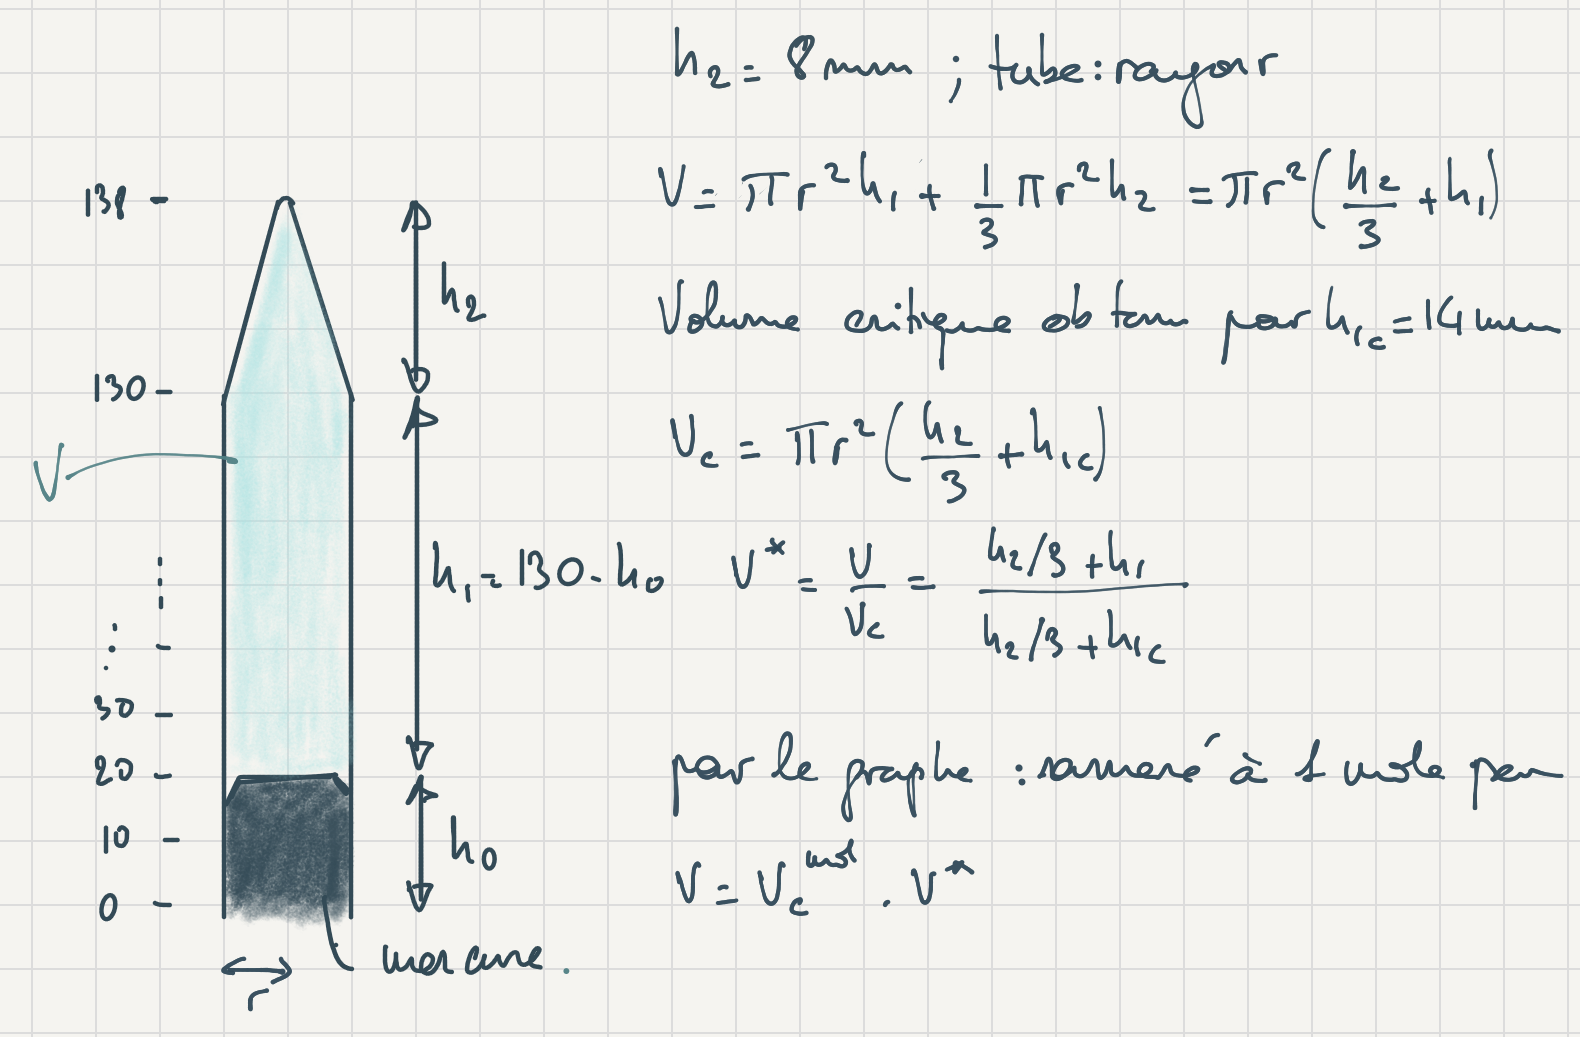

In [12]:
Image("tour_pt_critique_shema.png")

In [14]:
sf6exp= pd.read_csv('isoth_sf6.txt').values
h2=8
Vc_exp=14+h2/3

#Volume, renormalisé pour une mole
V_exp=1000*valcrit(sf6)[2]*(130-sf6exp[:,1]+h2/3)/Vc_exp
p_exp=sf6exp[:,2]
f3=figure(plot_height=400, plot_width=600,x_axis_label="Volume pour une mole(l)",y_axis_label="prerssion (bar)")
y2=f3.line(V_exp,p_exp,color="red")
y2=f3.circle(V_exp,p_exp,color="red",legend_label="Isotherme à 38.4°C")

show(f3)

### Comparaison entre l'expérience et les isothermes VdW et du GP

On en conclut que vdW ne marche en fait pas très bien pour le SF6

In [ ]:
vcsf6 = valcrit(sf6)

V = np.linspace(0.55*vcsf6[2]*1000,10*vcsf6[2]*1000,500)
p = vdwpressure(200,V/1000,sf6)/10**5
pi = gp(200,V/1000)/10**5

f4 = figure(title="SF6 ( 1 mole)",x_axis_label="volume(litres) ",
         y_axis_label="pression (bar)", plot_height=600, plot_width=800,x_range=(-0.5*vcsf6[2]*1000,10*vcsf6[2]*1000))

f4.line(vl*vcsf6[2]*1000,psat*vcsf6[1]/10**5,color='orange',line_width=2)
f4.line(vg*vcsf6[2]*1000,psat*vcsf6[1]/10**5,color='orange',line_width=2)


pvdw4 = f4.line(V,p,line_width=4,legend="VdW")
pgp4 = f4.line(V,pi,line_width=2,color="grey",legend="GP")
exp1 = f4.circle(V_exp,p_exp,color="red",legend="Expérience")
exp2 = f4.line(V_exp,p_exp,color="red")

def update(t=38.4):
    pvdw4.data_source.data['y'] = vdwpressure(t+273.15,V/1000,sf6)/10**5
    pgp4.data_source.data['y'] = gp(t+273.15,V/1000)/10**5
    push_notebook()


show(f4,notebook_handle=True)

interact(update,  t=(25,55,0.2));

## Tracé d'un réseau de n isothermes entre tmax et tmin (en °C)

In [ ]:

tmin=38
tmax=48
ncurves=6


vcsf6 = valcrit(sf6)

V = np.linspace(0.45*vcsf6[2]*1000,100*vcsf6[2]*1000,5000)


f5 = figure(title="SF6 (1 mole)",x_axis_label="volume (litres) ",
         y_axis_label="pression (bar)", plot_height=400, plot_width=600,x_range=(-2*vcsf6[2]*1000,100*vcsf6[2]*1000))

#Courbe de saturation
f5.line(vl*vcsf6[2]*1000,psat*vcsf6[1]/10**5,color='grey',line_width=2)
f5.line(vg*vcsf6[2]*1000,psat*vcsf6[1]/10**5,color='grey',line_width=2)

mypalette = bokeh.palettes.inferno(ncurves+1)
temperatures=np.linspace(tmax,tmin,ncurves)

vdwp = dict()

j=0

for i in temperatures:
    tstr=str(round(i,2))
    legend="T="+tstr+"°C"
    vdwp[i] = vdwpressure(i+273.15,V/1000,sf6)/10**5
    f5.line(V,vdwp[i],legend=legend,line_width=2,color=mypalette[j])
    j=j+1
    
show(f5)

## Tentative de faire un truc interractif ou on pourrait choisir le nombre de courbes. Ca ne marche pas (encore)

In [ ]:
mypalette6 = bokeh.palettes.inferno(8)

vcsf6 = valcrit(sf6)

V = np.linspace(0.45*vcsf6[2]*1000,100*vcsf6[2]*1000,5000)


f4 = figure(title="SF6 (1 mole)",x_axis_label="volume (litres) ",
         y_axis_label="pression (bar)", plot_height=400, plot_width=600,x_range=(-2*vcsf6[2]*1000,100*vcsf6[2]*1000))

#Courbe de saturation
f4.line(vl*vcsf6[2]*1000,psat*vcsf6[1]/10**5,color='grey',line_width=2)
f4.line(vg*vcsf6[2]*1000,psat*vcsf6[1]/10**5,color='grey',line_width=2)

temperatures=np.linspace(38,48,6)

vdwp = dict()

j=0

for i in temperatures:
    tstr=str(round(i,2))
    legend="T="+tstr+"°C"
    vdwp[i] = vdwpressure(i+273.15,V/1000,sf6)/10**5
    f4.line(V,vdwp[i],legend=legend,line_width=2,color=mypalette6[j])
    j=j+1
    

def update(tmin=38,tmax=48,ncurves=6):
    vdwp = dict()
    temperatures=np.linspace(tmin,tmax,ncurves)
    j=0
    for i in temperatures:
        tstr=str(round(i,2))
        legend="T="+tstr+"°C"
        vdwp[i].data_source.data['y'] = vdwpressure(i+273.15,V/1000,sf6)/10**5
        j=j+1
   
    push_notebook()


show(f4,notebook_handle=True)

interact(update,  tmin=(25,55,1),tmax=(25,55,1),ncurves=(1,10,1));



## L'eau avec VdW: ça ne marche pas bien du tout aux conditions ambiantes:

On remarque que à 100°C, $p_\text{sat}$ vaut dans les 20 bars, et l'eau bout à -15°C à pression atmosphérique...

In [ ]:
h2o=(5.537,0.03049)
#h2o=(6.2,0.02049)
vch2o = valcrit(h2o)

V = np.linspace(0.35*vch2o[2]*1000,500*vch2o[2]*1000,5000)
p = vdwpressure(200,V/1000,h2o)/10**5
pgp = gp(200,V/1000)/10**5

f2 = figure(title="Eau",x_axis_label="volume(litres) ",
         y_axis_label="pression (bar)", plot_height=400, plot_width=600,x_range=(-2*vch2o[2]*1000,500*vch2o[2]*1000),
           y_range=(-20,250))

f2.line(vl*vch2o[2]*1000,psat*vch2o[1]/10**5,color='grey',line_width=2)
f2.line(vg*vch2o[2]*1000,psat*vch2o[1]/10**5,color='grey',line_width=2)

r = f2.line(V,p,line_width=2)
#r2 = f2.line(V,pgp,color="orange")

def update(T=393):
    r.data_source.data['y'] = vdwpressure(T,V/1000,h2o)/10**5
#    r2.data_source.data['y'] = gp(T,V/1000)/10**5
    push_notebook()


show(f2,notebook_handle=True)

interact(update,  T=(240,700,1));

## Peng Robinson 78 pour l'eau

C'est l'équation d'état qui semble bien marcher pour l'eau. On pourrait calculer la courbe de saturation avec la rêgle de Maxwell comme pour van der Waals. Par contre, il faut se méfier de la forme de la courbe (extrêmement piquée puis très plate) qui va rendre le calcul numérique un peu problématique.

In [ ]:
Image("PengRob.png")

In [ ]:
#h2opr=(Tc,pc,omega)
h2opr=(647.3,221*10**5,0.344)
bprh20=0.078*R*h2opr[0]/(h2opr[1])
def pengrob(T,V,gazpr):
    Tc=gazpr[0]
    pc=gazpr[1]
    omega=gazpr[2]
    a=0.45724*R**2*Tc**2/pc
    b=0.078*R*Tc/pc
    kappa=0.37464+1.5422*omega-0.26992*omega**2
    alpha=(1+kappa*(1-(T/Tc)**0.5))**2
    press=R*T/(V-b)-a*alpha/(V**2+2*b*V-b**2)
    return press


In [ ]:
V = np.linspace(1.05*bprh20*1000,200*bprh20*1000,5000)
ppr=pengrob(373,V/1000,h2opr)/10**5

f7=figure()
f7.line(V,ppr)
show(f7)

In [ ]:
vch2o

In [ ]:
mypalette6 = bokeh.palettes.inferno(6)

vcco2 = valcrit(co2)

V = np.linspace(0.45*vcco2[2]*1000,100*vcco2[2]*1000,5000)


f2 = figure(title="CO2",x_axis_label="volume (litres) ",
         y_axis_label="pression (bar)", plot_height=400, plot_width=600,x_range=(-2*vcco2[2]*1000,100*vcco2[2]*1000))

#Courbe de saturation
f2.line(vl*vcco2[2]*1000,psat*vcco2[1]/10**5,color='grey',line_width=2)
f2.line(vg*vcco2[2]*1000,psat*vcco2[1]/10**5,color='grey',line_width=2)

temperatures=np.linspace(10,50,5)

j=0

for i in temperatures:
    temp=str(int(i))
    p = vdwpressure(i+273.15,V/1000,co2)/10**5
    f2.line(V,p,legend=temp,line_width=2,color=mypalette6[j])
    j=j+1
    
show(f2)

Notebook by Cécile Hébert (2019-2023).
Except where otherwise noted, the content of this notebook is licensed under MIT licence.